<a href="https://colab.research.google.com/github/callaghan210-coder/Data-Science/blob/main/Analysis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install ucimlrepo

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo


In [6]:
from ucimlrepo import fetch_ucirepo

# Fetch dataset
student_performance = fetch_ucirepo(id=320)

# Data (features and target)
X = student_performance.data.features
y = student_performance.data.targets

# Metadata and variable information
print(student_performance.metadata)
print(student_performance.variables)


{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proceedings of 5th Annual Future Business Technolo

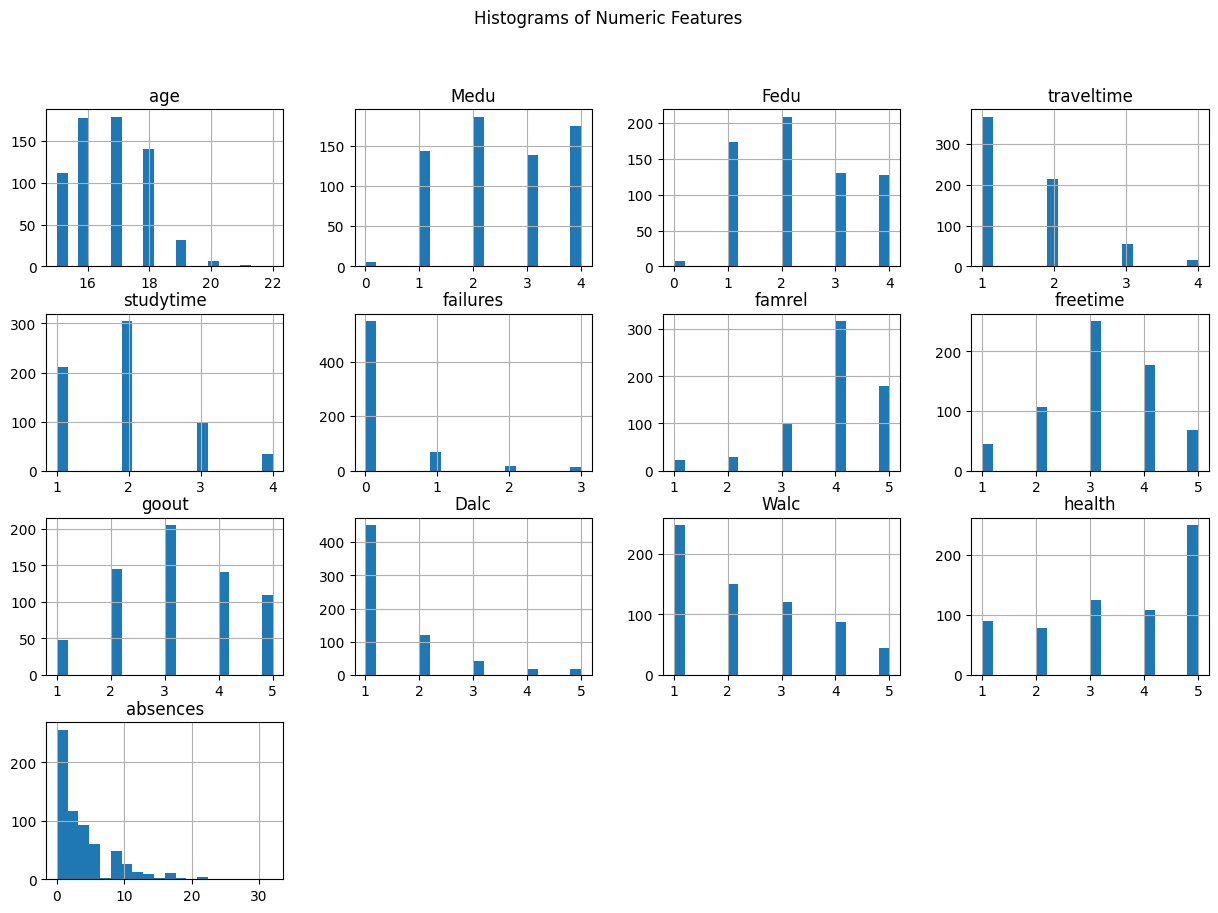

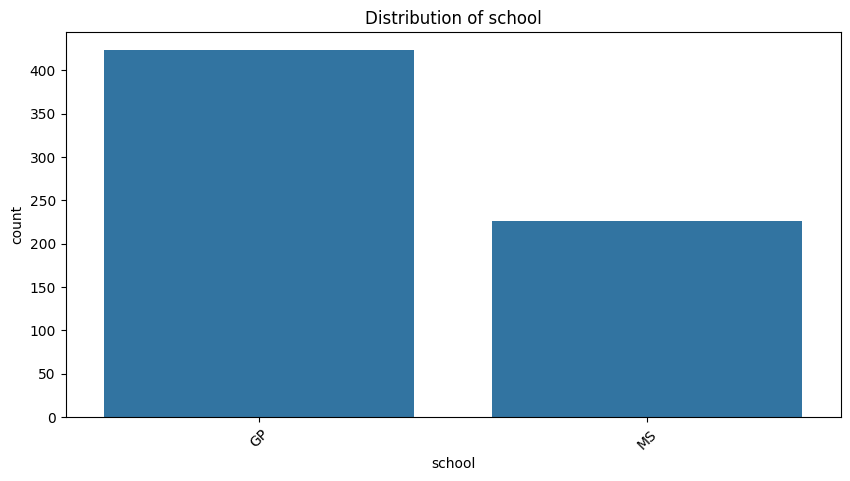

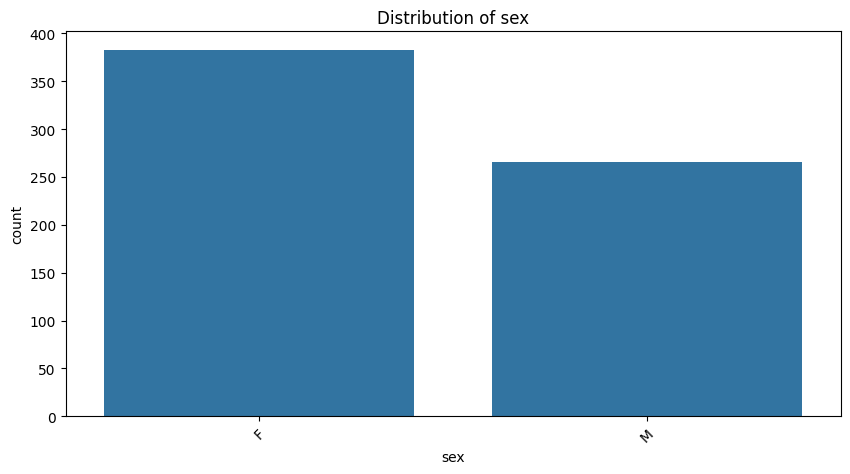

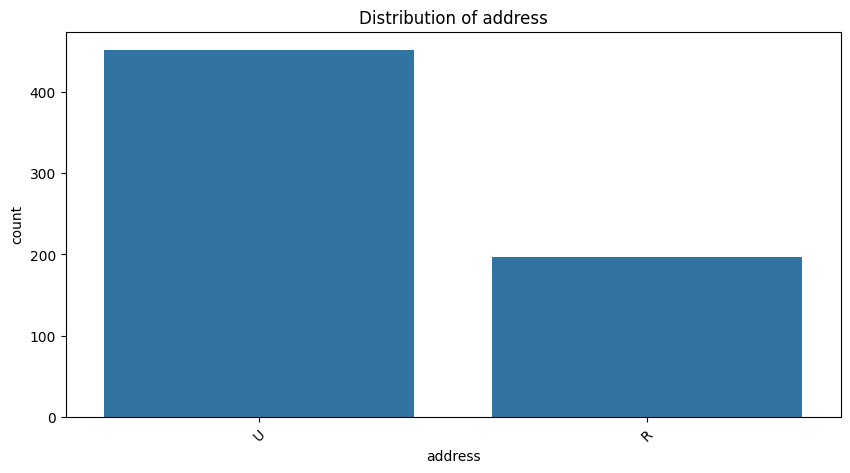

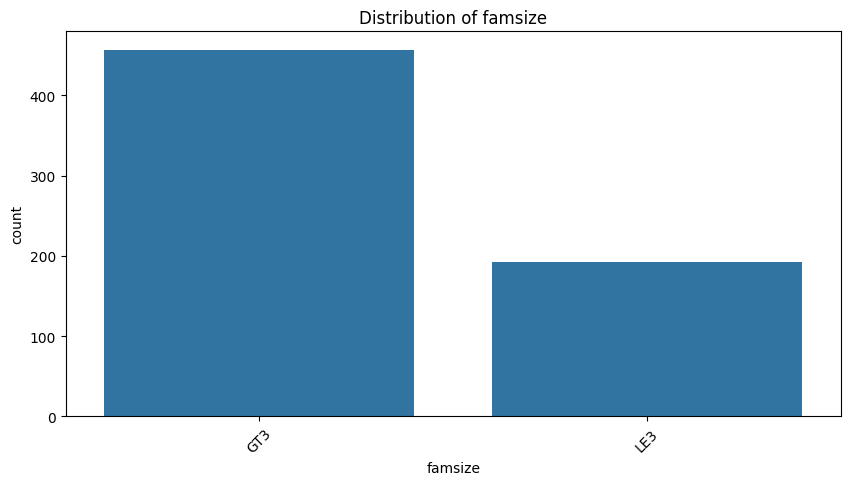

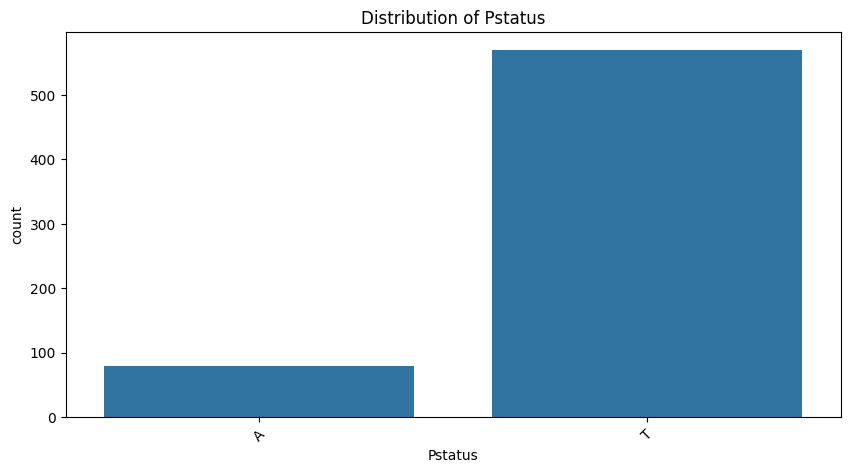

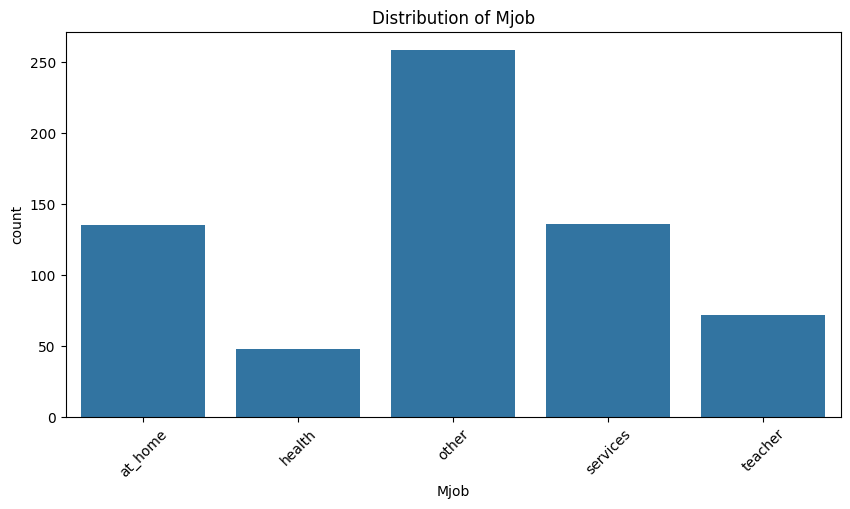

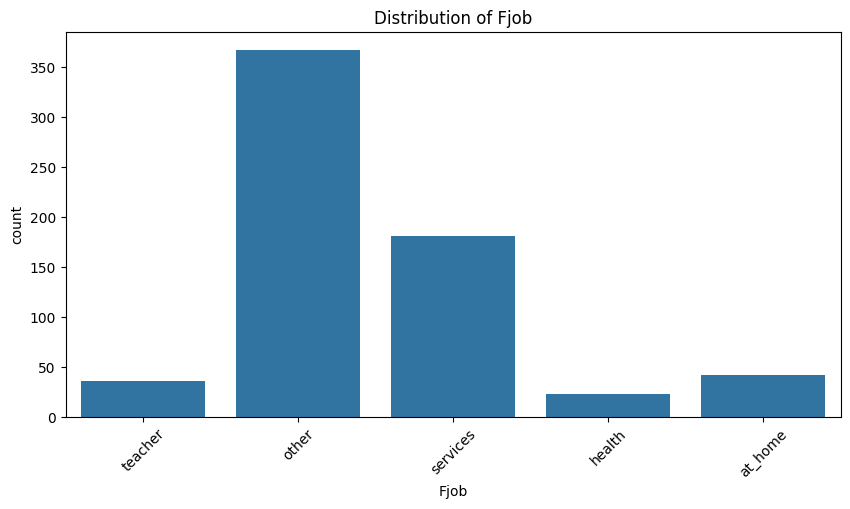

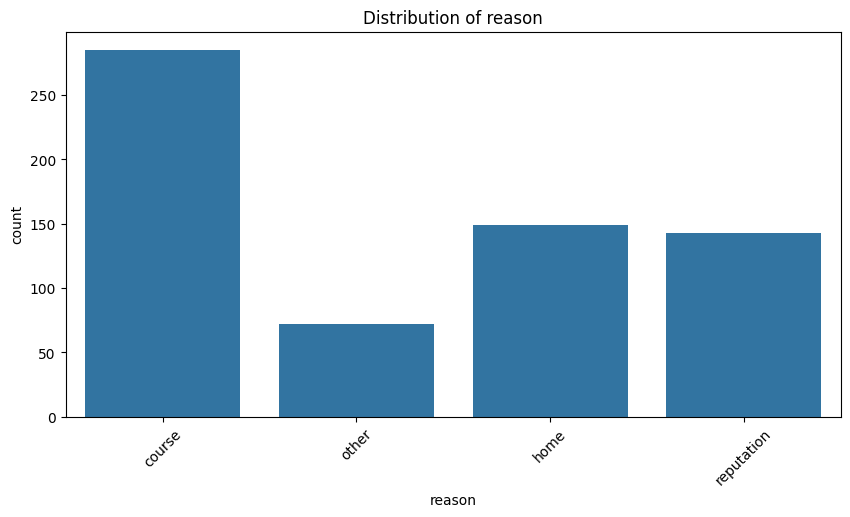

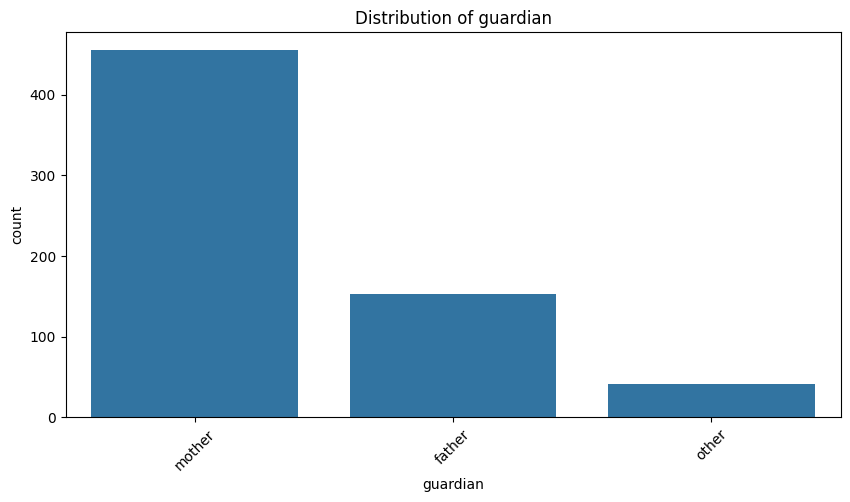

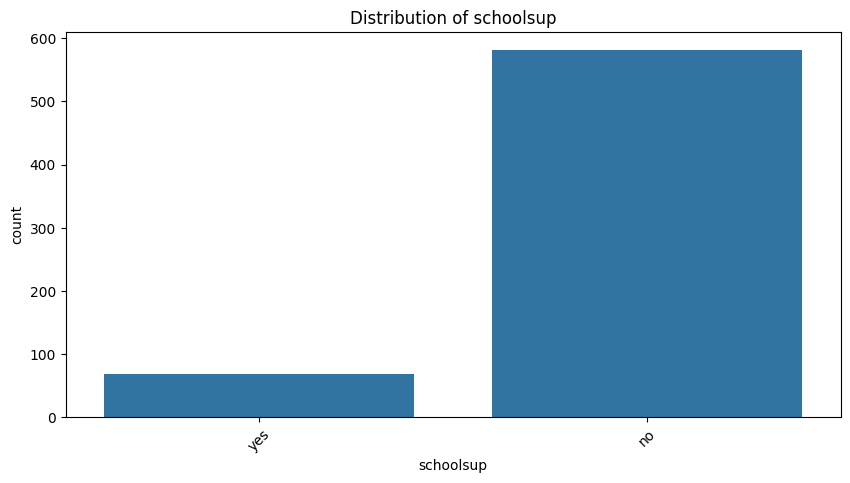

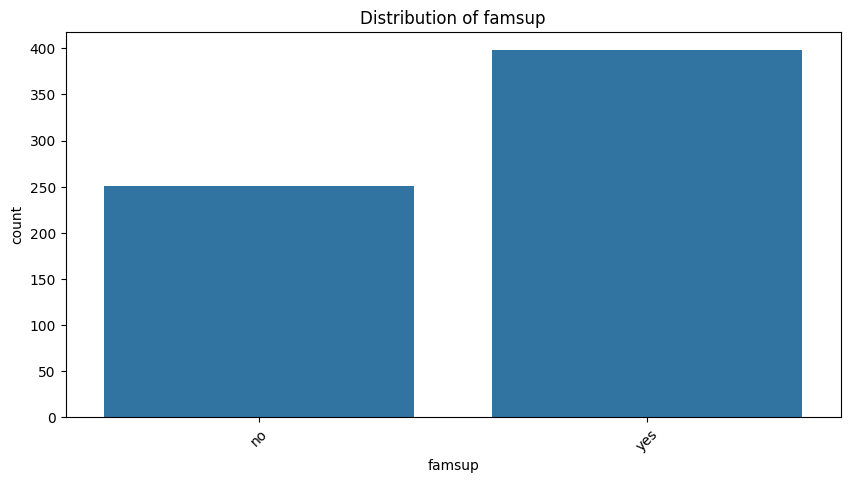

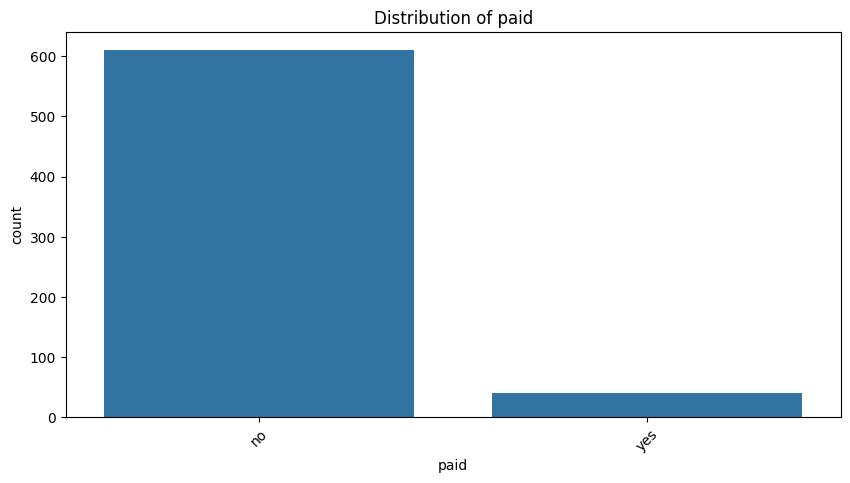

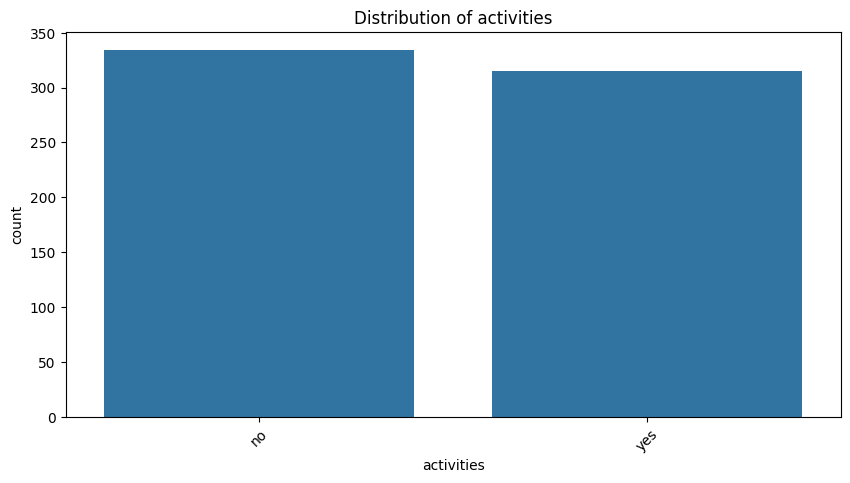

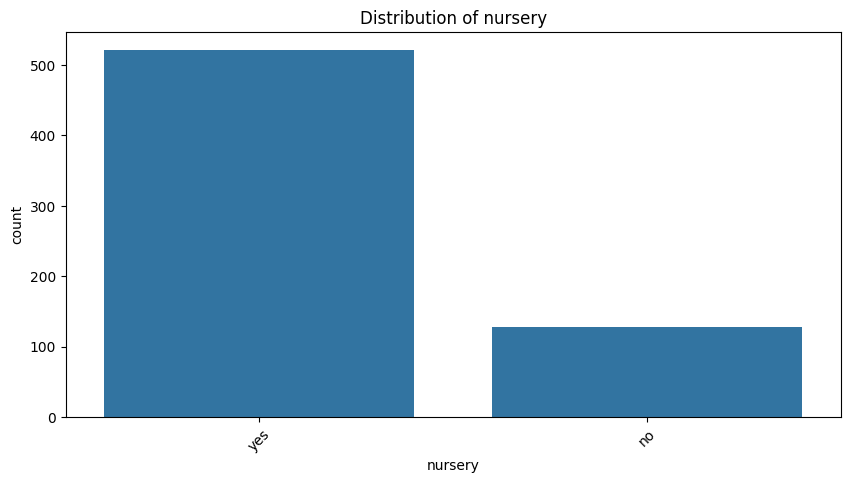

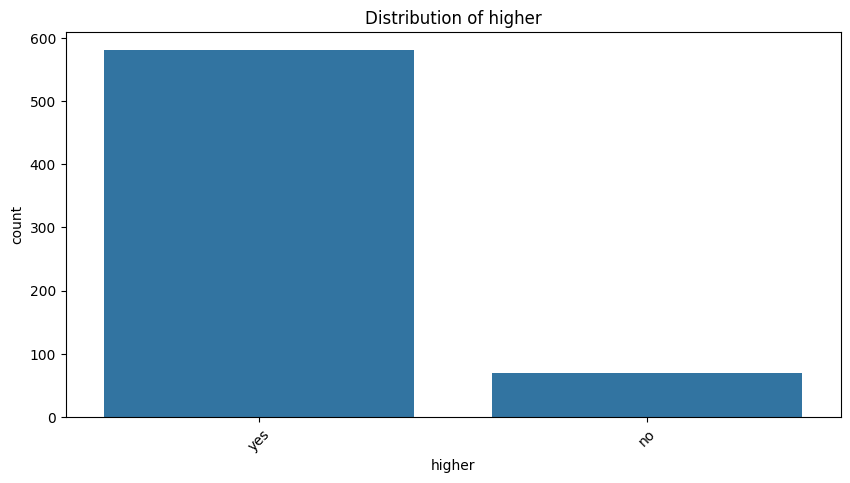

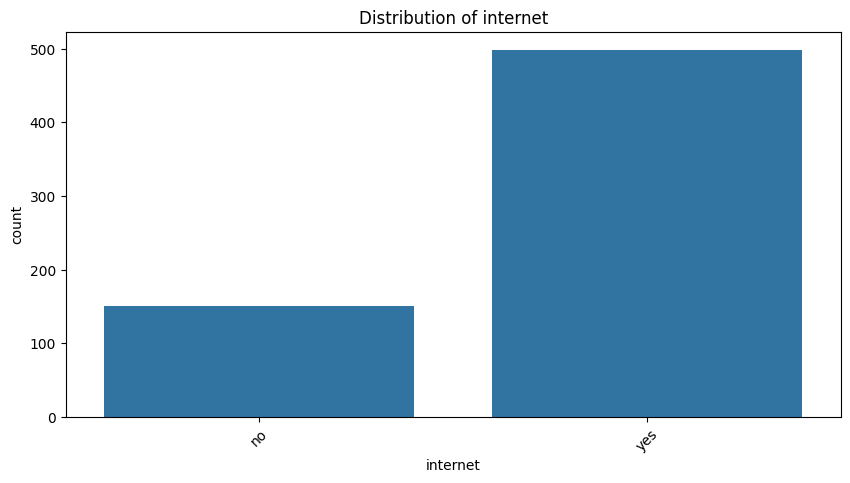

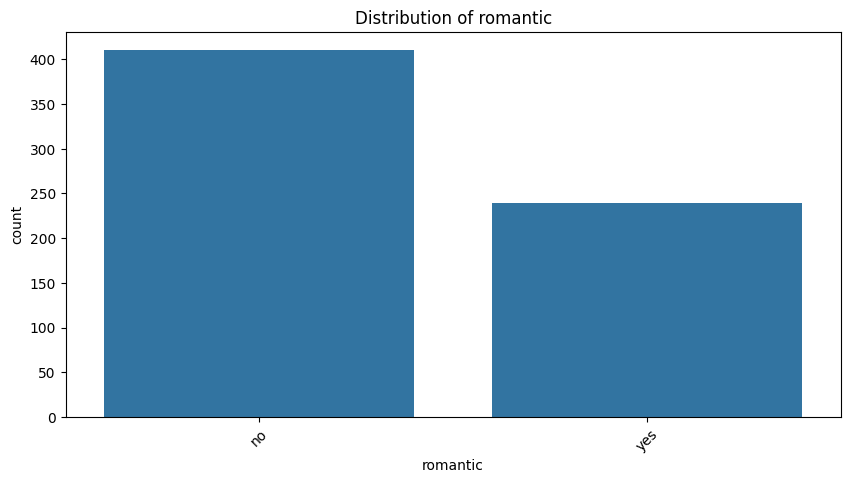

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numeric columns
X.select_dtypes(include=['number']).hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numeric Features')
plt.show()

# Bar plot for categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=X[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Check for non-numeric columns (should be none if all categorical were encoded)
print("Non-numeric columns remaining:", X_encoded.select_dtypes(include=['object']).columns)



Non-numeric columns remaining: Index([], dtype='object')


In [9]:
# Check for missing values
missing_values = X_encoded.isnull().sum()
print("Missing values in each column:\n", missing_values[missing_values > 0])


Missing values in each column:
 Series([], dtype: int64)


In [10]:
# Display descriptive statistics for the dataset
print(X_encoded.describe())


              age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std      0.955717    1.0510

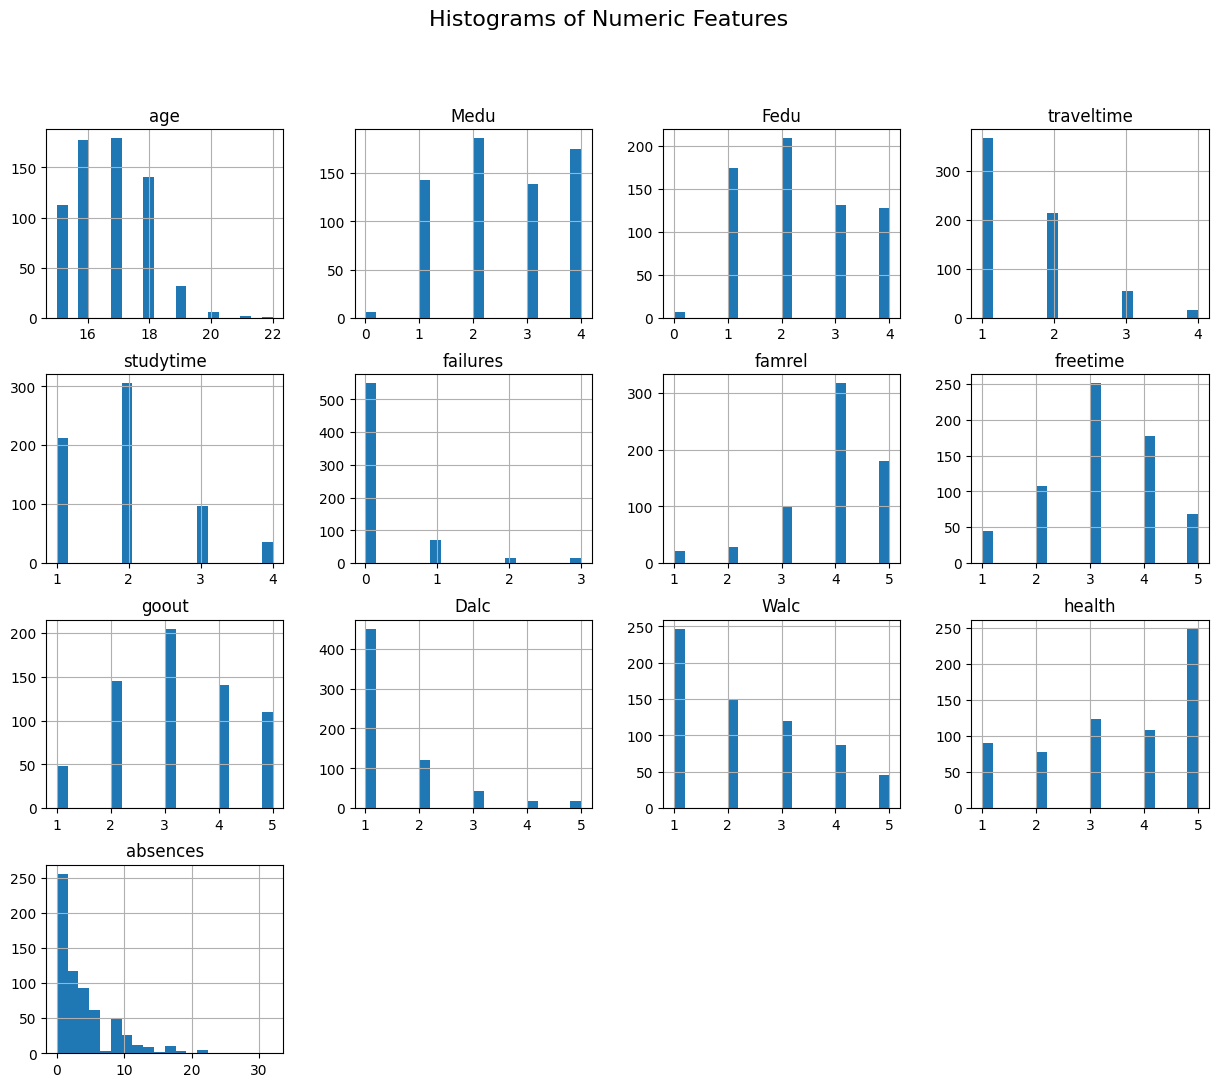

In [11]:
# Plot histograms for numeric features
X_encoded.hist(bins=20, figsize=(15, 12))
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.show()


Feature columns in X_encoded:
 Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_MS',
       'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')
Target columns in y:
 Index(['G1', 'G2', 'G3'], dtype='object')
Columns in combined dataset:
 Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_MS',
       'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T', 'Mjob_health',
       'Mjob_other', 'Mjob_ser

<ipython-input-12-abb39a7d02be>:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_encoded_with_targets[col], shade=True)


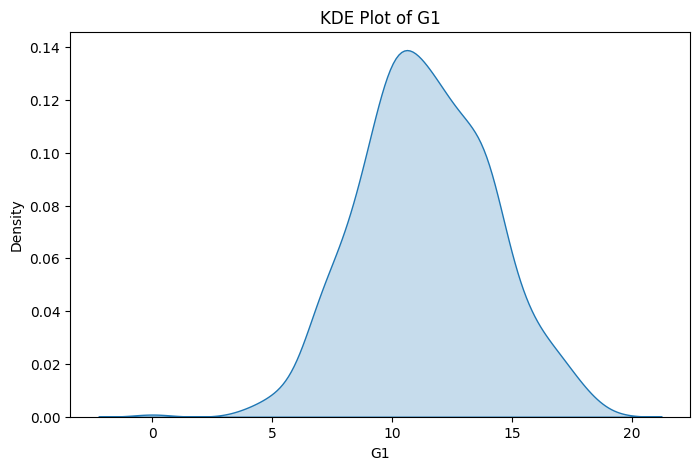

<ipython-input-12-abb39a7d02be>:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_encoded_with_targets[col], shade=True)


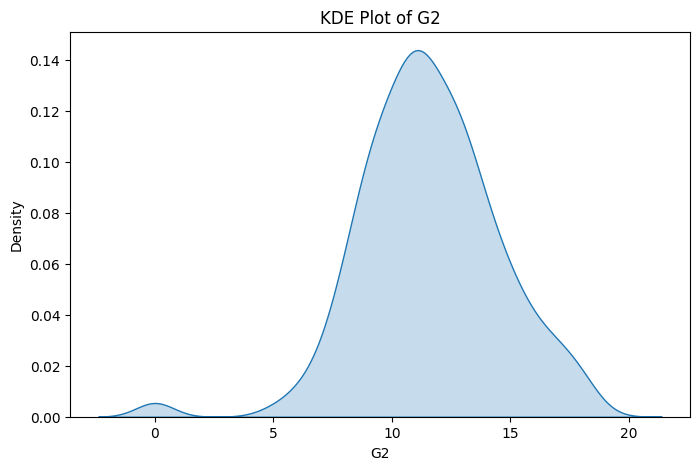

<ipython-input-12-abb39a7d02be>:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_encoded_with_targets[col], shade=True)


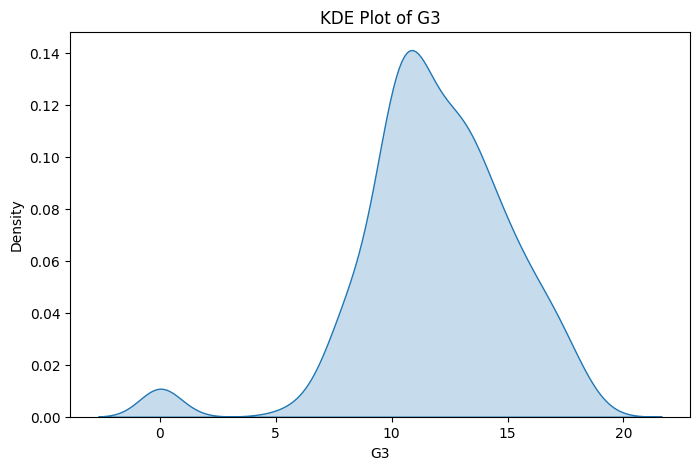

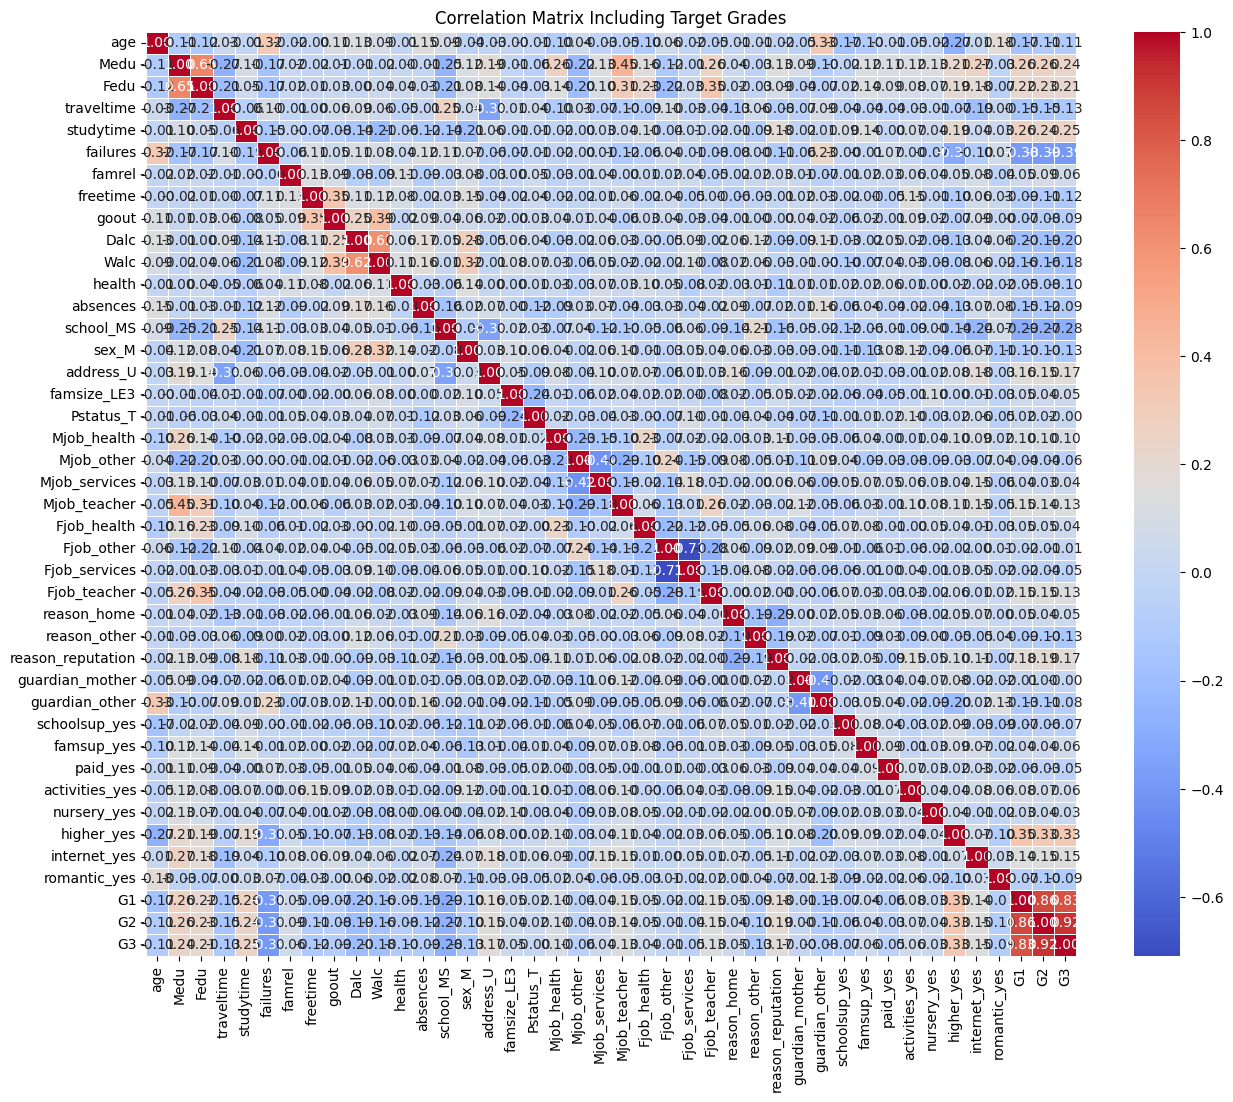

In [12]:
# Verify column names in X_encoded and y
print("Feature columns in X_encoded:\n", X_encoded.columns)
print("Target columns in y:\n", y.columns)

# Add G1, G2, and G3 from the target (y) to X_encoded for analysis
X_encoded_with_targets = pd.concat([X_encoded, y], axis=1)

# Check again if G1, G2, and G3 are now included
print("Columns in combined dataset:\n", X_encoded_with_targets.columns)

# Now we can proceed with KDE plots and correlation analysis on X_encoded_with_targets
# KDE plots for target grades
for col in ['G1', 'G2', 'G3']:
    if col in X_encoded_with_targets.columns:
        plt.figure(figsize=(8, 5))
        sns.kdeplot(X_encoded_with_targets[col], shade=True)
        plt.title(f'KDE Plot of {col}')
        plt.show()

# Correlation matrix including G1, G2, and G3
plt.figure(figsize=(15, 12))
sns.heatmap(X_encoded_with_targets.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Including Target Grades')
plt.show()


In [13]:
# Check for missing values in the combined dataset
missing_values = X_encoded_with_targets.isnull().sum()
print("Missing values in each column:\n", missing_values[missing_values > 0])

# Documentation note
if missing_values.sum() == 0:
    print("No missing values found. No imputation required.")
else:
    print("Missing values present, imputation needed.")


Missing values in each column:
 Series([], dtype: int64)
No missing values found. No imputation required.


In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the dataset (excluding target columns)
X_scaled = pd.DataFrame(scaler.fit_transform(X_encoded_with_targets.drop(columns=['G1', 'G2', 'G3'])),
                        columns=X_encoded_with_targets.columns.drop(['G1', 'G2', 'G3']))

# Add the target columns back into the scaled dataframe
X_scaled[['G1', 'G2', 'G3']] = X_encoded_with_targets[['G1', 'G2', 'G3']]

# Preview the scaled dataset
print(X_scaled.head())


        age      Medu      Fedu  traveltime  studytime  failures    famrel  \
0  1.031695  1.310216  1.540715    0.576718   0.083653 -0.374305  0.072606   
1  0.210137 -1.336039 -1.188832   -0.760032   0.083653 -0.374305  1.119748   
2 -1.432980 -1.336039 -1.188832   -0.760032   0.083653 -0.374305  0.072606   
3 -1.432980  1.310216 -0.278983   -0.760032   1.290114 -0.374305 -0.974536   
4 -0.611422  0.428131  0.630866   -0.760032   0.083653 -0.374305  0.072606   

   freetime     goout      Dalc  ...  famsup_yes  paid_yes  activities_yes  \
0 -0.171647  0.693785 -0.543555  ...   -1.259229 -0.252853       -0.971140   
1 -0.171647 -0.157380 -0.543555  ...    0.794137 -0.252853       -0.971140   
2 -0.171647 -1.008546  0.538553  ...   -1.259229 -0.252853       -0.971140   
3 -1.123771 -1.008546 -0.543555  ...    0.794137 -0.252853        1.029717   
4 -0.171647 -1.008546 -0.543555  ...    0.794137 -0.252853       -0.971140   

   nursery_yes  higher_yes  internet_yes  romantic_yes  G1  G2

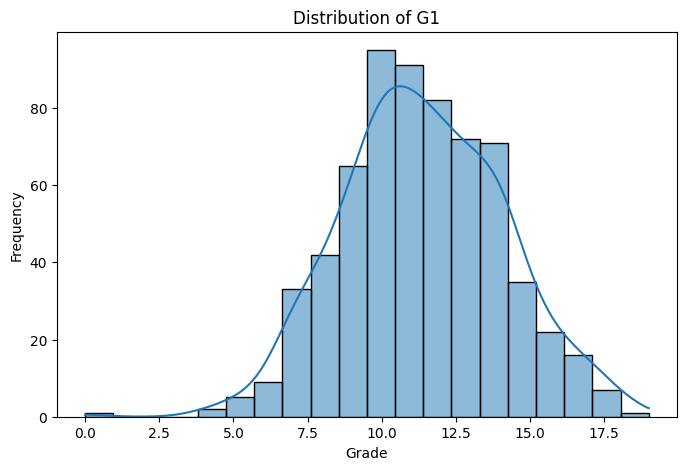

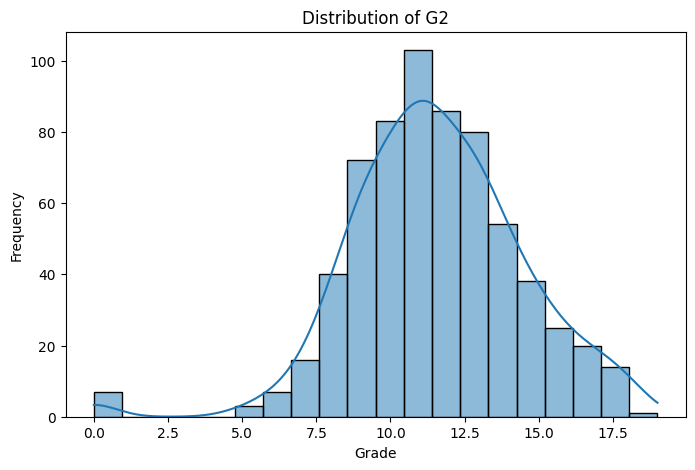

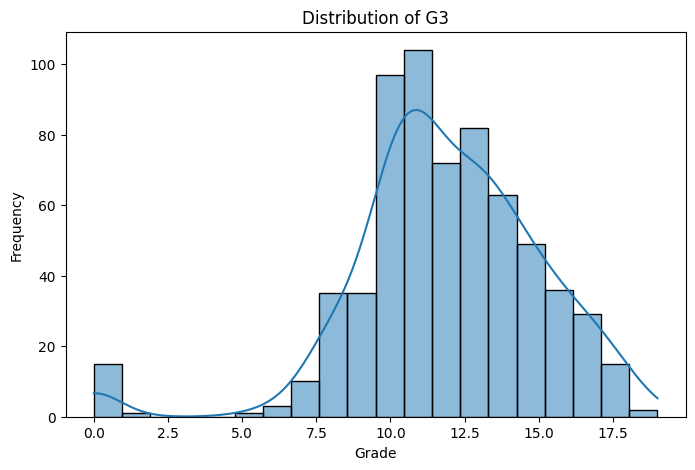

In [15]:
# Distribution plots for target variables to check for imbalance
for col in ['G1', 'G2', 'G3']:
    plt.figure(figsize=(8, 5))
    sns.histplot(X_scaled[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Grade')
    plt.ylabel('Frequency')
    plt.show()


In [16]:
pip install boruta


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 3.8 MB/s eta 0:00:00


In [17]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor

# Initialize a RandomForestRegressor as the estimator for Boruta
forest = RandomForestRegressor(n_jobs=-1, max_depth=5, random_state=42)

# Initialize Boruta with the random forest model
boruta_selector = BorutaPy(forest, n_estimators='auto', random_state=42)

# Fit Boruta on the scaled features and target (G3 as a primary target)
X_boruta = X_scaled.drop(columns=['G1', 'G2', 'G3'])
y_boruta = X_scaled['G3']
boruta_selector.fit(X_boruta.values, y_boruta.values)

# Get the selected features
selected_features_boruta = X_boruta.columns[boruta_selector.support_].to_list()
print("Boruta selected features:", selected_features_boruta)


Boruta selected features: ['failures', 'Dalc', 'Walc', 'absences', 'school_MS', 'higher_yes']


In [18]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

# Initialize SVR model with optimized hyperparameters
svr_estimator = SVR(kernel='linear', C=1.0)

# RFE with the SVR estimator
rfe_selector = RFE(estimator=svr_estimator, n_features_to_select=10, step=1)
rfe_selector.fit(X_boruta, y_boruta)

# Get the selected features
selected_features_rfe = X_boruta.columns[rfe_selector.support_].to_list()
print("RFE selected features:", selected_features_rfe)


RFE selected features: ['Medu', 'studytime', 'failures', 'health', 'absences', 'school_MS', 'sex_M', 'Fjob_teacher', 'schoolsup_yes', 'higher_yes']


In [19]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Initialize LASSO with cross-validation to find the optimal alpha (regularization parameter)
lasso = Lasso(alpha=0.01)  # Adjust alpha as needed for sparsity
lasso.fit(X_boruta, y_boruta)

# Select features where coefficients are non-zero
lasso_selector = SelectFromModel(lasso, prefit=True)
selected_features_lasso = X_boruta.columns[lasso_selector.get_support()].to_list()
print("LASSO selected features:", selected_features_lasso)


LASSO selected features: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T', 'Mjob_health', 'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother', 'guardian_other', 'schoolsup_yes', 'paid_yes', 'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes', 'romantic_yes']


In [20]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, StackingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV

# SVM with GridSearchCV (enable probability estimates)
svc_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.001, 0.01, 0.1]}
svc = SVC(probability=True)  # Enable probability support for SVM
svc_grid = GridSearchCV(svc, svc_params, cv=5, scoring='accuracy')
svc_grid.fit(X_train, y_train)
print("Best SVM parameters:", svc_grid.best_params_)

# Logistic Regression with GridSearchCV
lr_params = {'C': [0.01, 0.1, 1, 10, 100]}
lr = LogisticRegression(max_iter=200)
lr_grid = GridSearchCV(lr, lr_params, cv=5, scoring='accuracy')
lr_grid.fit(X_train, y_train)
print("Best Logistic Regression parameters:", lr_grid.best_params_)

# KNN with GridSearchCV
knn_params = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)
print("Best KNN parameters:", knn_grid.best_params_)

# Decision Tree with GridSearchCV
dt_params = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)
print("Best Decision Tree parameters:", dt_grid.best_params_)

# AdaBoost with GridSearchCV
ada_params = {'n_estimators': [50, 100, 200]}
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1))
ada_grid = GridSearchCV(ada, ada_params, cv=5, scoring='accuracy')
ada_grid.fit(X_train, y_train)
print("Best AdaBoost parameters:", ada_grid.best_params_)

# Bagging with GridSearchCV
bag_params = {'n_estimators': [10, 50, 100], 'max_samples': [0.5, 1.0]}
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)
bag_grid = GridSearchCV(bag, bag_params, cv=5, scoring='accuracy')
bag_grid.fit(X_train, y_train)
print("Best Bagging parameters:", bag_grid.best_params_)

# Stacking Classifier with Logistic Regression as final estimator
estimators = [('lr', lr_grid.best_estimator_), ('knn', knn_grid.best_estimator_), ('dt', dt_grid.best_estimator_)]
stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())  # Use Logistic Regression for predict_proba support
stacking.fit(X_train, y_train)
print("Stacking classifier created with best estimators.")

# Voting Classifier with soft voting to get probabilities
voting = VotingClassifier(estimators=[
    ('svc', svc_grid.best_estimator_),
    ('lr', lr_grid.best_estimator_),
    ('knn', knn_grid.best_estimator_),
    ('dt', dt_grid.best_estimator_)
], voting='soft')  # Use soft voting for probability estimates
voting.fit(X_train, y_train)
print("Voting classifier created with best estimators.")


NameError: name 'X_train' is not defined

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, StackingClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier  # Base estimator for bagging
from sklearn.naive_bayes import GaussianNB

# Dictionary to store the best model parameters
best_models = {}

# 1. Support Vector Machine (SVM)
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.01, 0.1, 1]
}
svm = SVC()
svm_grid = GridSearchCV(svm, svm_params, cv=5)
best_models['SVM'] = svm_grid

# 2. Logistic Regression
lr_params = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
lr = LogisticRegression(max_iter=1000)
lr_grid = GridSearchCV(lr, lr_params, cv=5)
best_models['Logistic Regression'] = lr_grid

# 3. K-Nearest Neighbors (KNN)
knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_params, cv=5)
best_models['KNN'] = knn_grid

# 4. Decision Tree
dt_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt, dt_params, cv=5)
best_models['Decision Tree'] = dt_grid

# 5. AdaBoost
ada_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1]
}
ada = AdaBoostClassifier()
ada_grid = GridSearchCV(ada, ada_params, cv=5)
best_models['AdaBoost'] = ada_grid

# 6. Bagging Classifier
bagging_params = {
    'n_estimators': [10, 50, 100],
    'estimator': [DecisionTreeClassifier(max_depth=3)]
}
bagging = BaggingClassifier()
bagging_grid = GridSearchCV(bagging, bagging_params, cv=5)
best_models['Bagging'] = bagging_grid

# 7. Stacking Classifier (Using LR and KNN as estimators)
stacking = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('knn', KNeighborsClassifier(n_neighbors=5))
    ]
)
stacking_params = {
    'final_estimator': [LogisticRegression(), RandomForestClassifier()]
}
stacking_grid = GridSearchCV(stacking, stacking_params, cv=5)
best_models['Stacking'] = stacking_grid

# 8. Voting Classifier (SVM, Logistic Regression, KNN as components)
voting = VotingClassifier(
    estimators=[
        ('svm', SVC(probability=True)),
        ('lr', LogisticRegression(max_iter=1000)),
        ('knn', KNeighborsClassifier())
    ],
    voting='soft'
)
voting_params = {
    'weights': [[1, 1, 1], [2, 1, 1], [1, 2, 1]]
}
voting_grid = GridSearchCV(voting, voting_params, cv=5)
best_models['Voting'] = voting_grid

# Running the grid search for each model
for model_name, grid_search in best_models.items():
    print(f"Optimizing {model_name}...")
    grid_search.fit(X_boruta, y_boruta)
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {model_name}: {grid_search.best_score_}\n")


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X_boruta and y_boruta are the final feature set and target variable, respectively
X_train, X_test, y_train, y_test = train_test_split(X_boruta, y_boruta, test_size=0.2, random_state=42)

print("Training and Testing Data Split Complete.")
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")


In [ ]:
# Initialize an empty list to store evaluation results
evaluation_results_list = []

# Training, prediction, and metric evaluation for each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Get probability predictions, ensuring compatibility with roc_auc_score
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)
        if y_pred_proba.shape[1] == len(np.unique(y_test)):
            roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
        else:
            roc_auc = np.nan
    else:
        y_pred_proba = None
        roc_auc = np.nan

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    specificity = calculate_specificity(y_test, y_pred)

    # Store results in the list
    evaluation_results_list.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Specificity': specificity,
        'ROC-AUC': roc_auc
    })

    # Print confusion matrix for each model
    print(f"Confusion Matrix for {model_name}:\n", confusion_matrix(y_test, y_pred), "\n")

# Convert the list to a DataFrame for display
evaluation_results = pd.DataFrame(evaluation_results_list)

# Display the evaluation metrics
print("Evaluation Metrics for Each Model Without Feature Selection:")
print(evaluation_results)


In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor

# Initialize a RandomForestRegressor for Boruta
forest = RandomForestRegressor(n_jobs=-1, max_depth=5, random_state=42)
boruta_selector = BorutaPy(forest, n_estimators='auto', random_state=42)

# Fit Boruta on the original features
boruta_selector.fit(X_train.values, y_train.values)

# Select the features chosen by Boruta
selected_features_boruta = X_train.columns[boruta_selector.support_].to_list()
X_train_boruta = X_train[selected_features_boruta]
X_test_boruta = X_test[selected_features_boruta]

print("Boruta selected features:", selected_features_boruta)


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

# Initialize SVR model for RFE
svr_estimator = SVR(kernel='linear', C=1.0)
rfe_selector = RFE(estimator=svr_estimator, n_features_to_select=10, step=1)
rfe_selector.fit(X_train, y_train)

# Select features chosen by RFE
selected_features_rfe = X_train.columns[rfe_selector.support_].to_list()
X_train_rfe = X_train[selected_features_rfe]
X_test_rfe = X_test[selected_features_rfe]

print("RFE selected features:", selected_features_rfe)


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Initialize Lasso model and fit to training data
lasso = Lasso(alpha=0.01)  # Set alpha for sparsity level
lasso.fit(X_train, y_train)

# Select features based on non-zero Lasso coefficients
lasso_selector = SelectFromModel(lasso, prefit=True)
selected_features_lasso = X_train.columns[lasso_selector.get_support()].to_list()
X_train_lasso = X_train[selected_features_lasso]
X_test_lasso = X_test[selected_features_lasso]

print("LASSO selected features:", selected_features_lasso)


In [ ]:
# Function to calculate and display evaluation metrics including confusion matrix
def evaluate_and_display_models(X_train, X_test, y_train, y_test, selected_features_name):
    results = []
    for model_name, model in models.items():
        print(f"Training {model_name} on {selected_features_name} features...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Probability predictions for ROC-AUC calculation if available
        if hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(X_test)
            if y_pred_proba.shape[1] == len(np.unique(y_test)):
                roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
            else:
                roc_auc = np.nan
        else:
            y_pred_proba = None
            roc_auc = np.nan

        # Calculate all metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        specificity = calculate_specificity(y_test, y_pred)
        confusion = confusion_matrix(y_test, y_pred)

        # Append all results, including confusion matrix
        results.append({
            'Model': model_name,
            'Feature Selection': selected_features_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Specificity': specificity,
            'ROC-AUC': roc_auc,
            'Confusion Matrix': confusion
        })

        # Print all metrics including the confusion matrix for each model
        print(f"\nMetrics for {model_name} ({selected_features_name}):")
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1 Score: {f1:.4f}")
        print(f"  Specificity: {specificity:.4f}")
        print(f"  ROC-AUC: {roc_auc if roc_auc is not np.nan else 'Not Available'}")
        print(f"  Confusion Matrix:\n{confusion}\n")

    # Convert results to a DataFrame for structured output
    return pd.DataFrame(results)

# Evaluate models on feature-selected datasets and print full metrics
evaluation_results_boruta = evaluate_and_display_models(X_train_boruta, X_test_boruta, y_train, y_test, 'Boruta')
evaluation_results_rfe = evaluate_and_display_models(X_train_rfe, X_test_rfe, y_train, y_test, 'RFE')
evaluation_results_lasso = evaluate_and_display_models(X_train_lasso, X_test_lasso, y_train, y_test, 'LASSO')

# Concatenate all results into a single DataFrame
all_evaluation_results = pd.concat([evaluation_results_boruta, evaluation_results_rfe, evaluation_results_lasso], ignore_index=True)

# Display all evaluation metrics in tabular form
print("\nAll Evaluation Metrics Across Models and Feature Selection Techniques:")
print(all_evaluation_results)


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

# Adjusted function to handle multi-class ROC-AUC plotting
def plot_multiclass_roc_auc(model, X_test, y_test, title):
    # Binarize the output for multi-class ROC-AUC
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_test_bin.shape[1]

    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)

        # Plot ROC curve for each class
        plt.figure(figsize=(10, 6))
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, label=f'Class {i} (area = {roc_auc:.2f})')

        plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC-AUC Curve for {title} (Multi-Class)")
        plt.legend(loc="best")
        plt.grid()
        plt.show()
    else:
        print(f"{title} does not support probability predictions for ROC-AUC plotting.")

# Evaluate and plot learning and ROC-AUC curves for the best models
for model_name, model in models.items():
    # Learning Curve
    print(f"Generating Learning Curve for {model_name}")
    plot_learning_curve(model, X_train, y_train, model_name)

    # Multi-class ROC-AUC Curve
    print(f"Generating ROC-AUC Curve for {model_name}")
    plot_multiclass_roc_auc(model, X_test, y_test, model_name)


In [ ]:
# Required Imports
!pip install ucimlrepo
!pip install boruta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, StackingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

# Fetch dataset
student_performance = fetch_ucirepo(id=320)

# Data (features and target)
X = student_performance.data.features
y = student_performance.data.targets

# Metadata and variable information
print(student_performance.metadata)
print(student_performance.variables)

# Histogram for numeric columns
X.select_dtypes(include=['number']).hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numeric Features')
plt.show()

# Bar plot for categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=X[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

# One-hot encoding for categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
print("Non-numeric columns remaining:", X_encoded.select_dtypes(include=['object']).columns)

# Check for missing values
missing_values = X_encoded.isnull().sum()
print("Missing values in each column:\n", missing_values[missing_values > 0])

# Descriptive statistics
print(X_encoded.describe())

# Plot histograms for numeric features in encoded data
X_encoded.hist(bins=20, figsize=(15, 12))
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.show()

# Combine features and target for analysis
X_encoded_with_targets = pd.concat([X_encoded, y], axis=1)
print("Columns in combined dataset:\n", X_encoded_with_targets.columns)

# KDE plots for target grades
for col in ['G1', 'G2', 'G3']:
    if col in X_encoded_with_targets.columns:
        plt.figure(figsize=(8, 5))
        sns.kdeplot(X_encoded_with_targets[col], shade=True)
        plt.title(f'KDE Plot of {col}')
        plt.show()

# Correlation matrix including G1, G2, and G3
plt.figure(figsize=(15, 12))
sns.heatmap(X_encoded_with_targets.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Including Target Grades')
plt.show()

# Standardize features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_encoded_with_targets.drop(columns=['G1', 'G2', 'G3'])),
                        columns=X_encoded_with_targets.columns.drop(['G1', 'G2', 'G3']))
X_scaled[['G1', 'G2', 'G3']] = X_encoded_with_targets[['G1', 'G2', 'G3']]
print(X_scaled.head())

# Boruta feature selection
forest = RandomForestRegressor(n_jobs=-1, max_depth=5, random_state=42)
boruta_selector = BorutaPy(forest, n_estimators='auto', random_state=42)
X_boruta = X_scaled.drop(columns=['G1', 'G2', 'G3'])
y_boruta = X_scaled['G3']
boruta_selector.fit(X_boruta.values, y_boruta.values)
selected_features_boruta = X_boruta.columns[boruta_selector.support_].to_list()
print("Boruta selected features:", selected_features_boruta)

# RFE feature selection
svr_estimator = SVR(kernel='linear', C=1.0)
rfe_selector = RFE(estimator=svr_estimator, n_features_to_select=10, step=1)
rfe_selector.fit(X_boruta, y_boruta)
selected_features_rfe = X_boruta.columns[rfe_selector.support_].to_list()
print("RFE selected features:", selected_features_rfe)

# LASSO feature selection
lasso = Lasso(alpha=0.01)
lasso.fit(X_boruta, y_boruta)
lasso_selector = SelectFromModel(lasso, prefit=True)
selected_features_lasso = X_boruta.columns[lasso_selector.get_support()].to_list()
print("LASSO selected features:", selected_features_lasso)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_boruta[selected_features_boruta], y_boruta, test_size=0.2, random_state=42)

# Classifier Models for Grid Search
models = {
    'SVM': GridSearchCV(SVC(probability=True), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.001, 0.01, 0.1]}, cv=5),
    'Logistic Regression': GridSearchCV(LogisticRegression(max_iter=200), {'C': [0.01, 0.1, 1, 10, 100]}, cv=5),
    'KNN': GridSearchCV(KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}, cv=5),
    'Decision Tree': GridSearchCV(DecisionTreeClassifier(), {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}, cv=5),
    'AdaBoost': GridSearchCV(AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1)), {'n_estimators': [50, 100, 200]}, cv=5),
}

# Training and printing best params for each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{model_name} best parameters:", model.best_params_)

# Evaluation function
def evaluate_and_display_models(X_train, X_test, y_train, y_test):
    results = []
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        confusion = confusion_matrix(y_test, y_pred)

        results.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Confusion Matrix': confusion
        })
        print(f"\nConfusion Matrix for {model_name}:\n", confusion, "\n")

    return pd.DataFrame(results)

# Display Evaluation
evaluation_results = evaluate_and_display_models(X_train, X_test, y_train, y_test)
print("\nEvaluation Results:\n", evaluation_results)



In [ ]:
# Importing required libraries for the added plots
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

# Assuming `X_train` and `y_train` are available for training models
# Ensure each model is trained before visualizations

# 1. Feature Importance Plot after Boruta Selection
print("Feature Importance Plot - Boruta Selection")
forest.fit(X_train_boruta, y_train)  # Train forest model on Boruta-selected features
importances = forest.feature_importances_
features = X_train_boruta.columns

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance from Boruta-Selected Features")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# 2. Feature Importance Plot after RFE Selection
print("Feature Importance Plot - RFE Selection")
svr_estimator.fit(X_train_rfe, y_train)  # Train SVR on RFE-selected features

# Calculating permutation importance if feature importance attribute is not available in SVR
rfe_importances = permutation_importance(svr_estimator, X_train_rfe, y_train, n_repeats=10, random_state=42)
sorted_idx = rfe_importances.importances_mean.argsort()

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(X_train_rfe.columns[sorted_idx], rfe_importances.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance from RFE-Selected Features")
plt.show()

# 3. Feature Coefficients Plot after LASSO Selection
print("Feature Coefficients - LASSO Selection")
lasso.fit(X_train_lasso, y_train)
coef = lasso.coef_

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=coef, y=X_train_lasso.columns)
plt.title("Non-Zero Feature Coefficients Selected by LASSO")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

# 4. Flowchart of the Model Architecture (Diagram)
from graphviz import Digraph

# Drawing the flowchart diagram
flowchart = Digraph()
flowchart.node("A", "Raw Data")
flowchart.node("B", "Preprocessing")
flowchart.node("C", "Feature Selection (Boruta, RFE, LASSO)")
flowchart.node("D", "Model Training")
flowchart.node("E", "Evaluation & Tuning")

flowchart.edge("A", "B")
flowchart.edge("B", "C")
flowchart.edge("C", "D")
flowchart.edge("D", "E")

flowchart.render("model_architecture_flowchart", format="png", view=True)  # Save and view the flowchart

# 5. Learning Curves for Models with RFE Selection
from sklearn.model_selection import learning_curve

# Function for plotting learning curve
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=5, n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label="Training Score")
    plt.plot(train_sizes, val_scores_mean, label="Validation Score")
    plt.title(f"Learning Curve: {title}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Score")
    plt.legend()
    plt.show()

# Applying the learning curve function to each model with RFE-selected features
for model_name, model in models.items():
    plot_learning_curve(model, X_train_rfe, y_train, model_name)

# 6. Confusion Matrix Plots for Each Optimized Model with RFE Features
for model_name, model in models.items():
    print(f"Confusion Matrix for {model_name}")
    model.fit(X_train_rfe, y_train)  # Ensure model is trained
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test_rfe, y_test, display_labels=np.unique(y_test), cmap='Blues')
    plt.title(f"Confusion Matrix for {model_name} with RFE Features")
    plt.show()
